# Logical modeling of cPLA2-induced inflammation upon activation of immune system receptors

This notebook is created for the reproducible analysis of the cPLA2 model using the software tools developed by the Colomoto Consortium. 

### Imports and model loading with GINsim
The first thing to do is to import the necessary tools for performing our analysis.

In [1]:
import ginsim 
import biolqm
import maboss
import pypint
from pypint import Goal # avoid typing pypint
from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
from itertools import combinations
from functools import reduce

import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-01-24`

## The cPLA2 logical model

### Load and visualize network

In [2]:
lrg = ginsim.load("Sep7.zginml")
ginsim.show(lrg)

### Identification of attractors (bioLQM)

In [4]:
'''Convert ginsim model to a biolqm compliant model '''
lqm = ginsim.to_biolqm(lrg)

### Visualization of attractors

We visualise each stable state obtained in a graph that highlights the active components (yellow nodes) and the trajectories (blue arcs) taken with a GINsim function. 

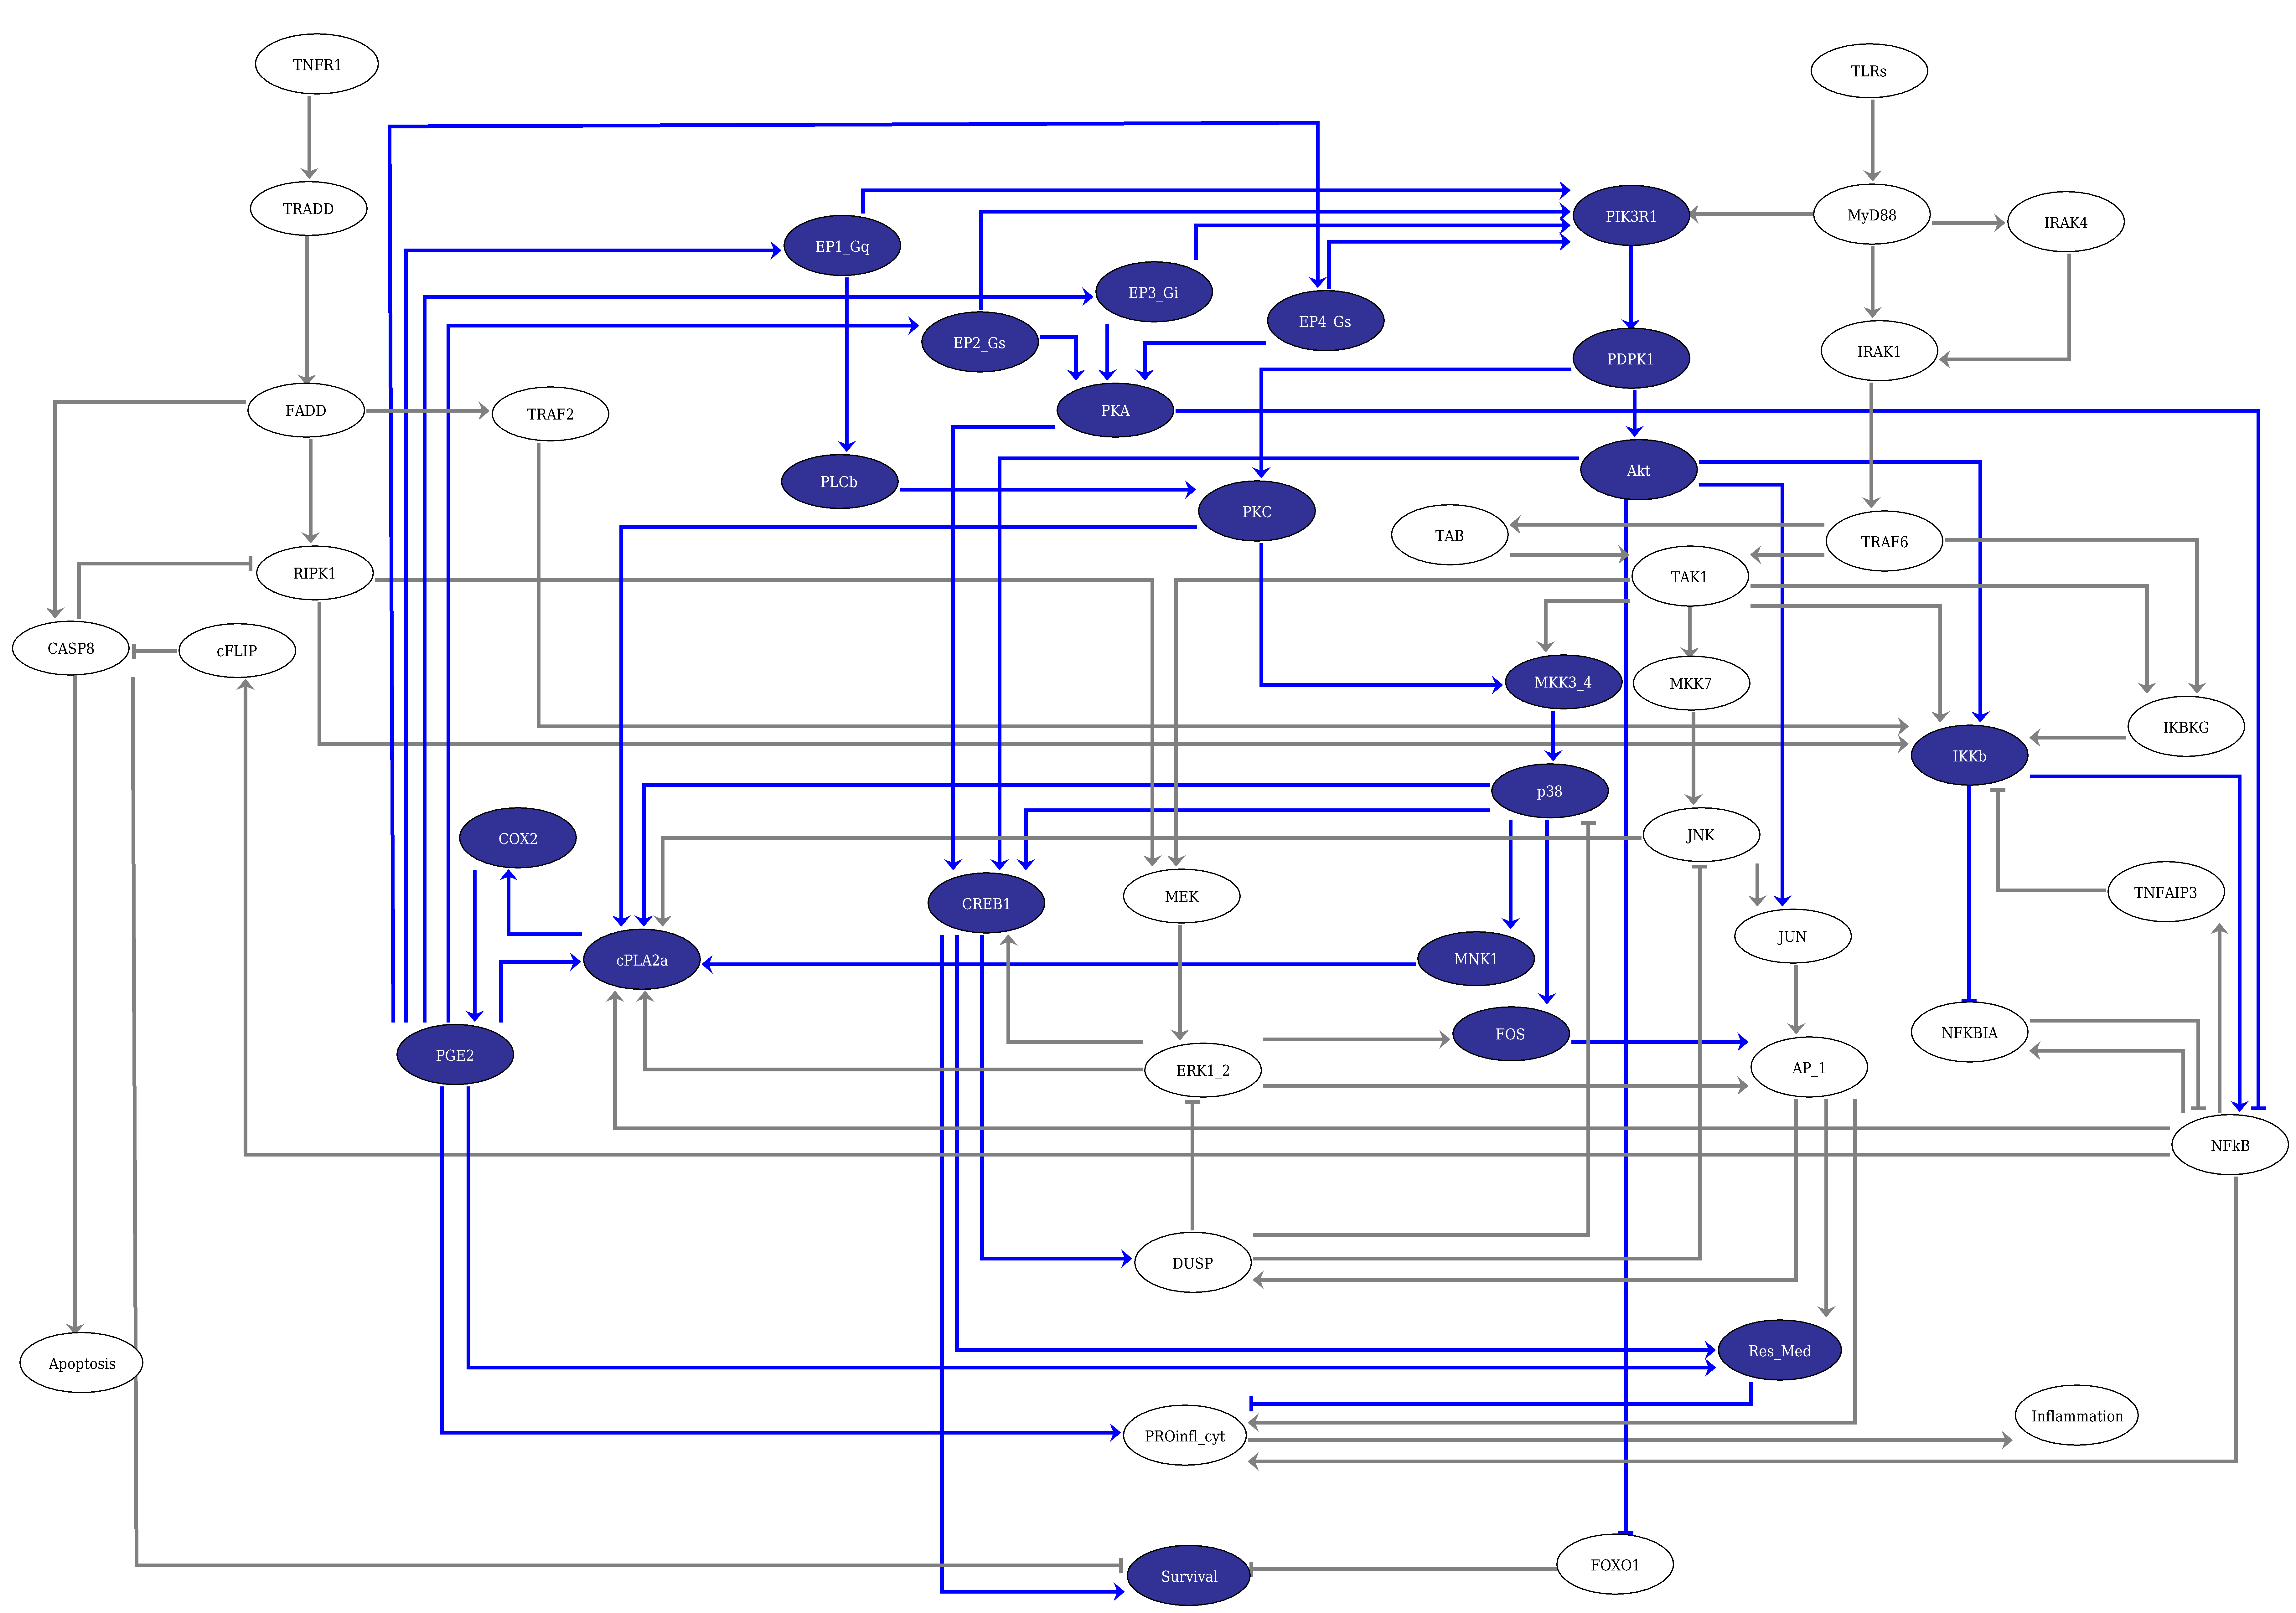

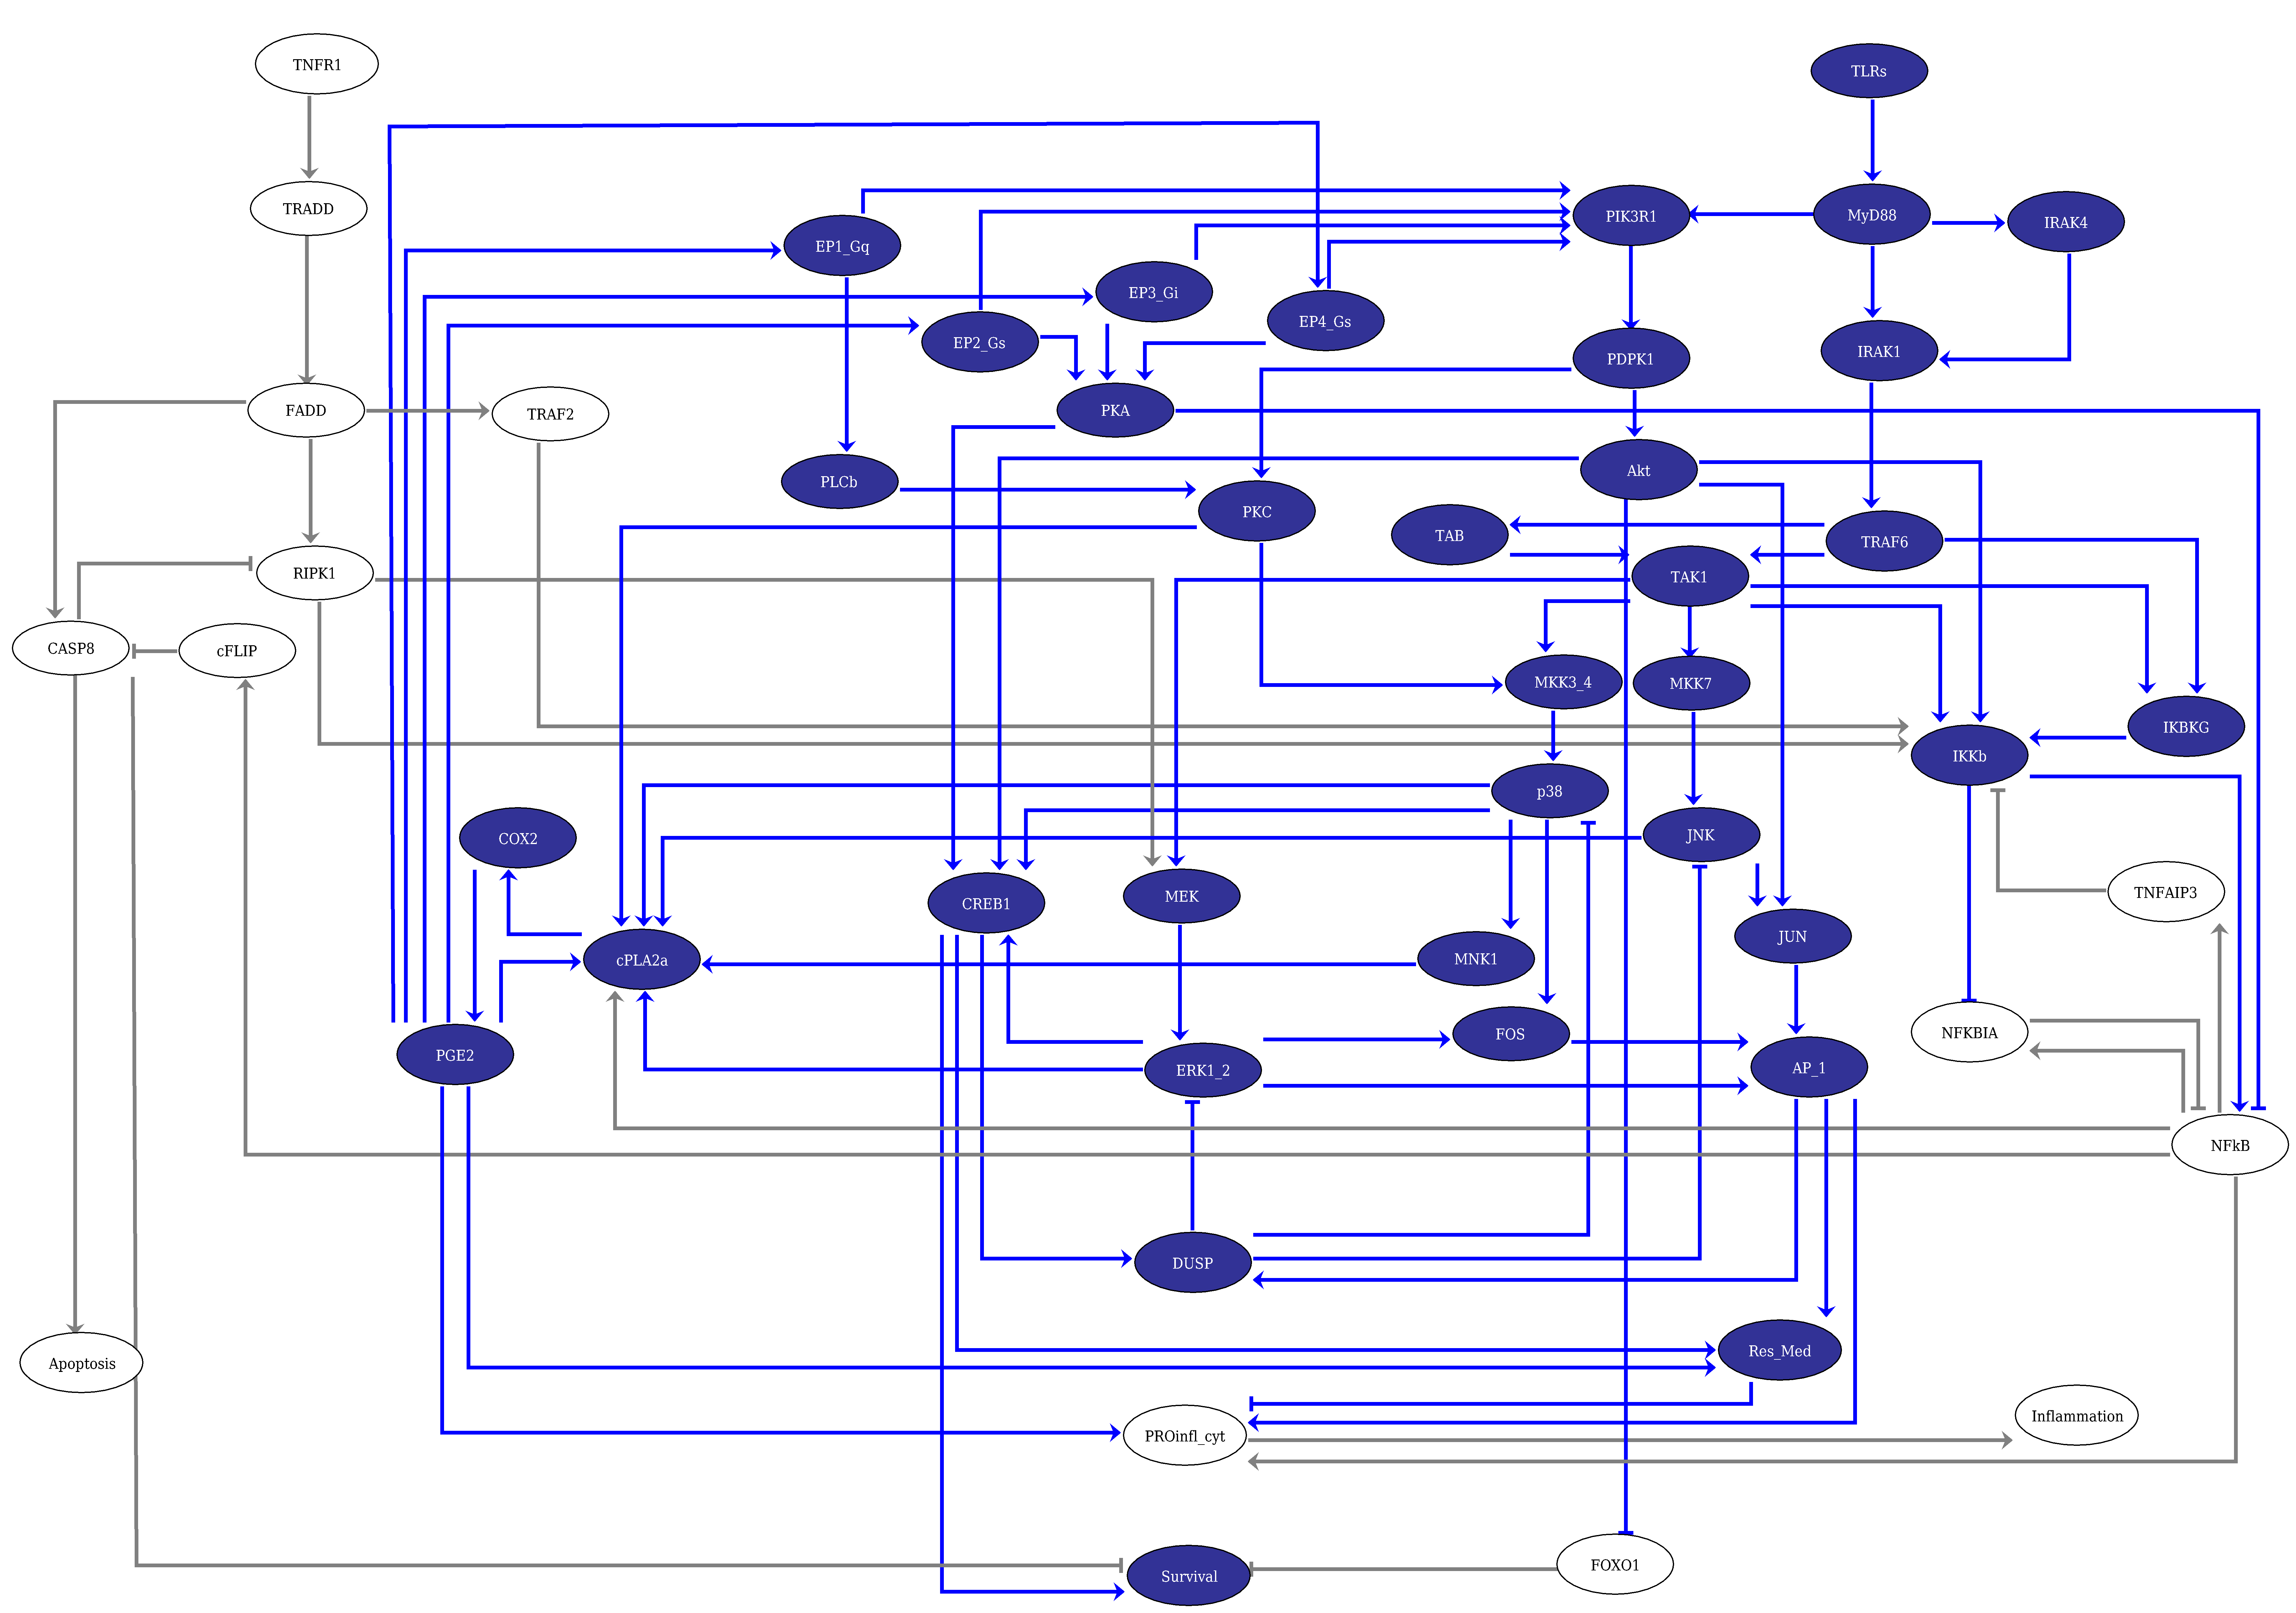

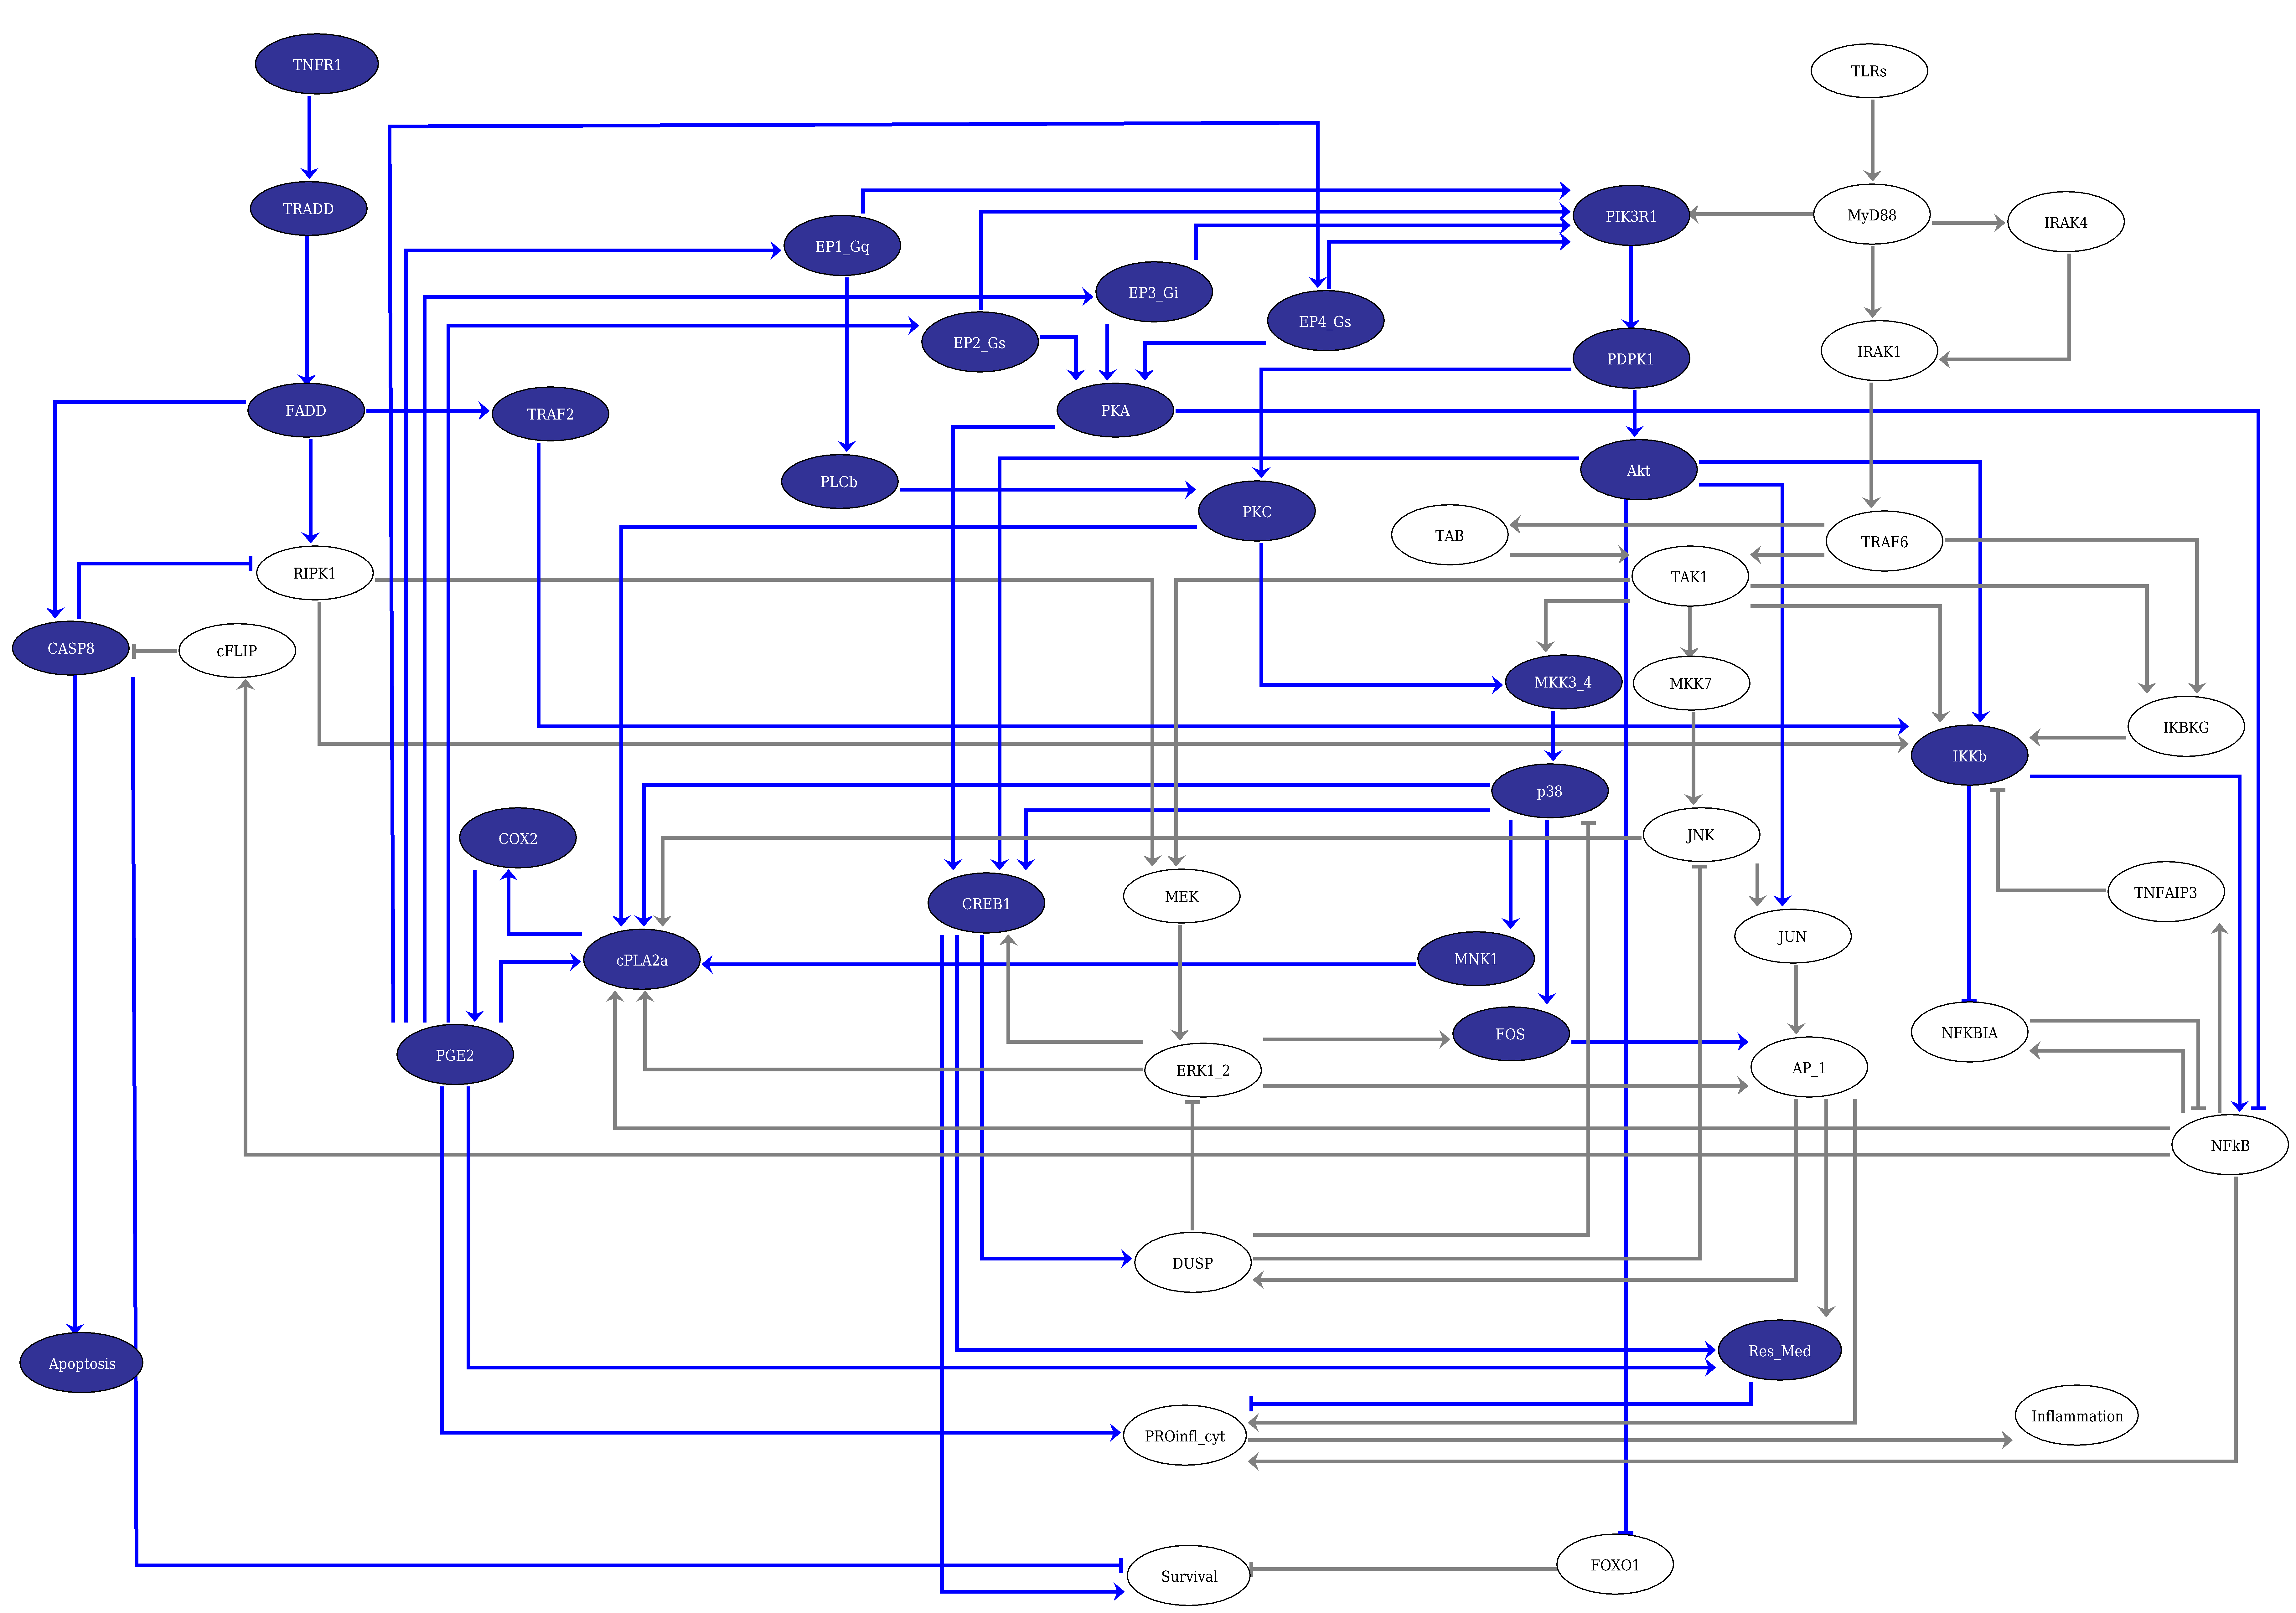

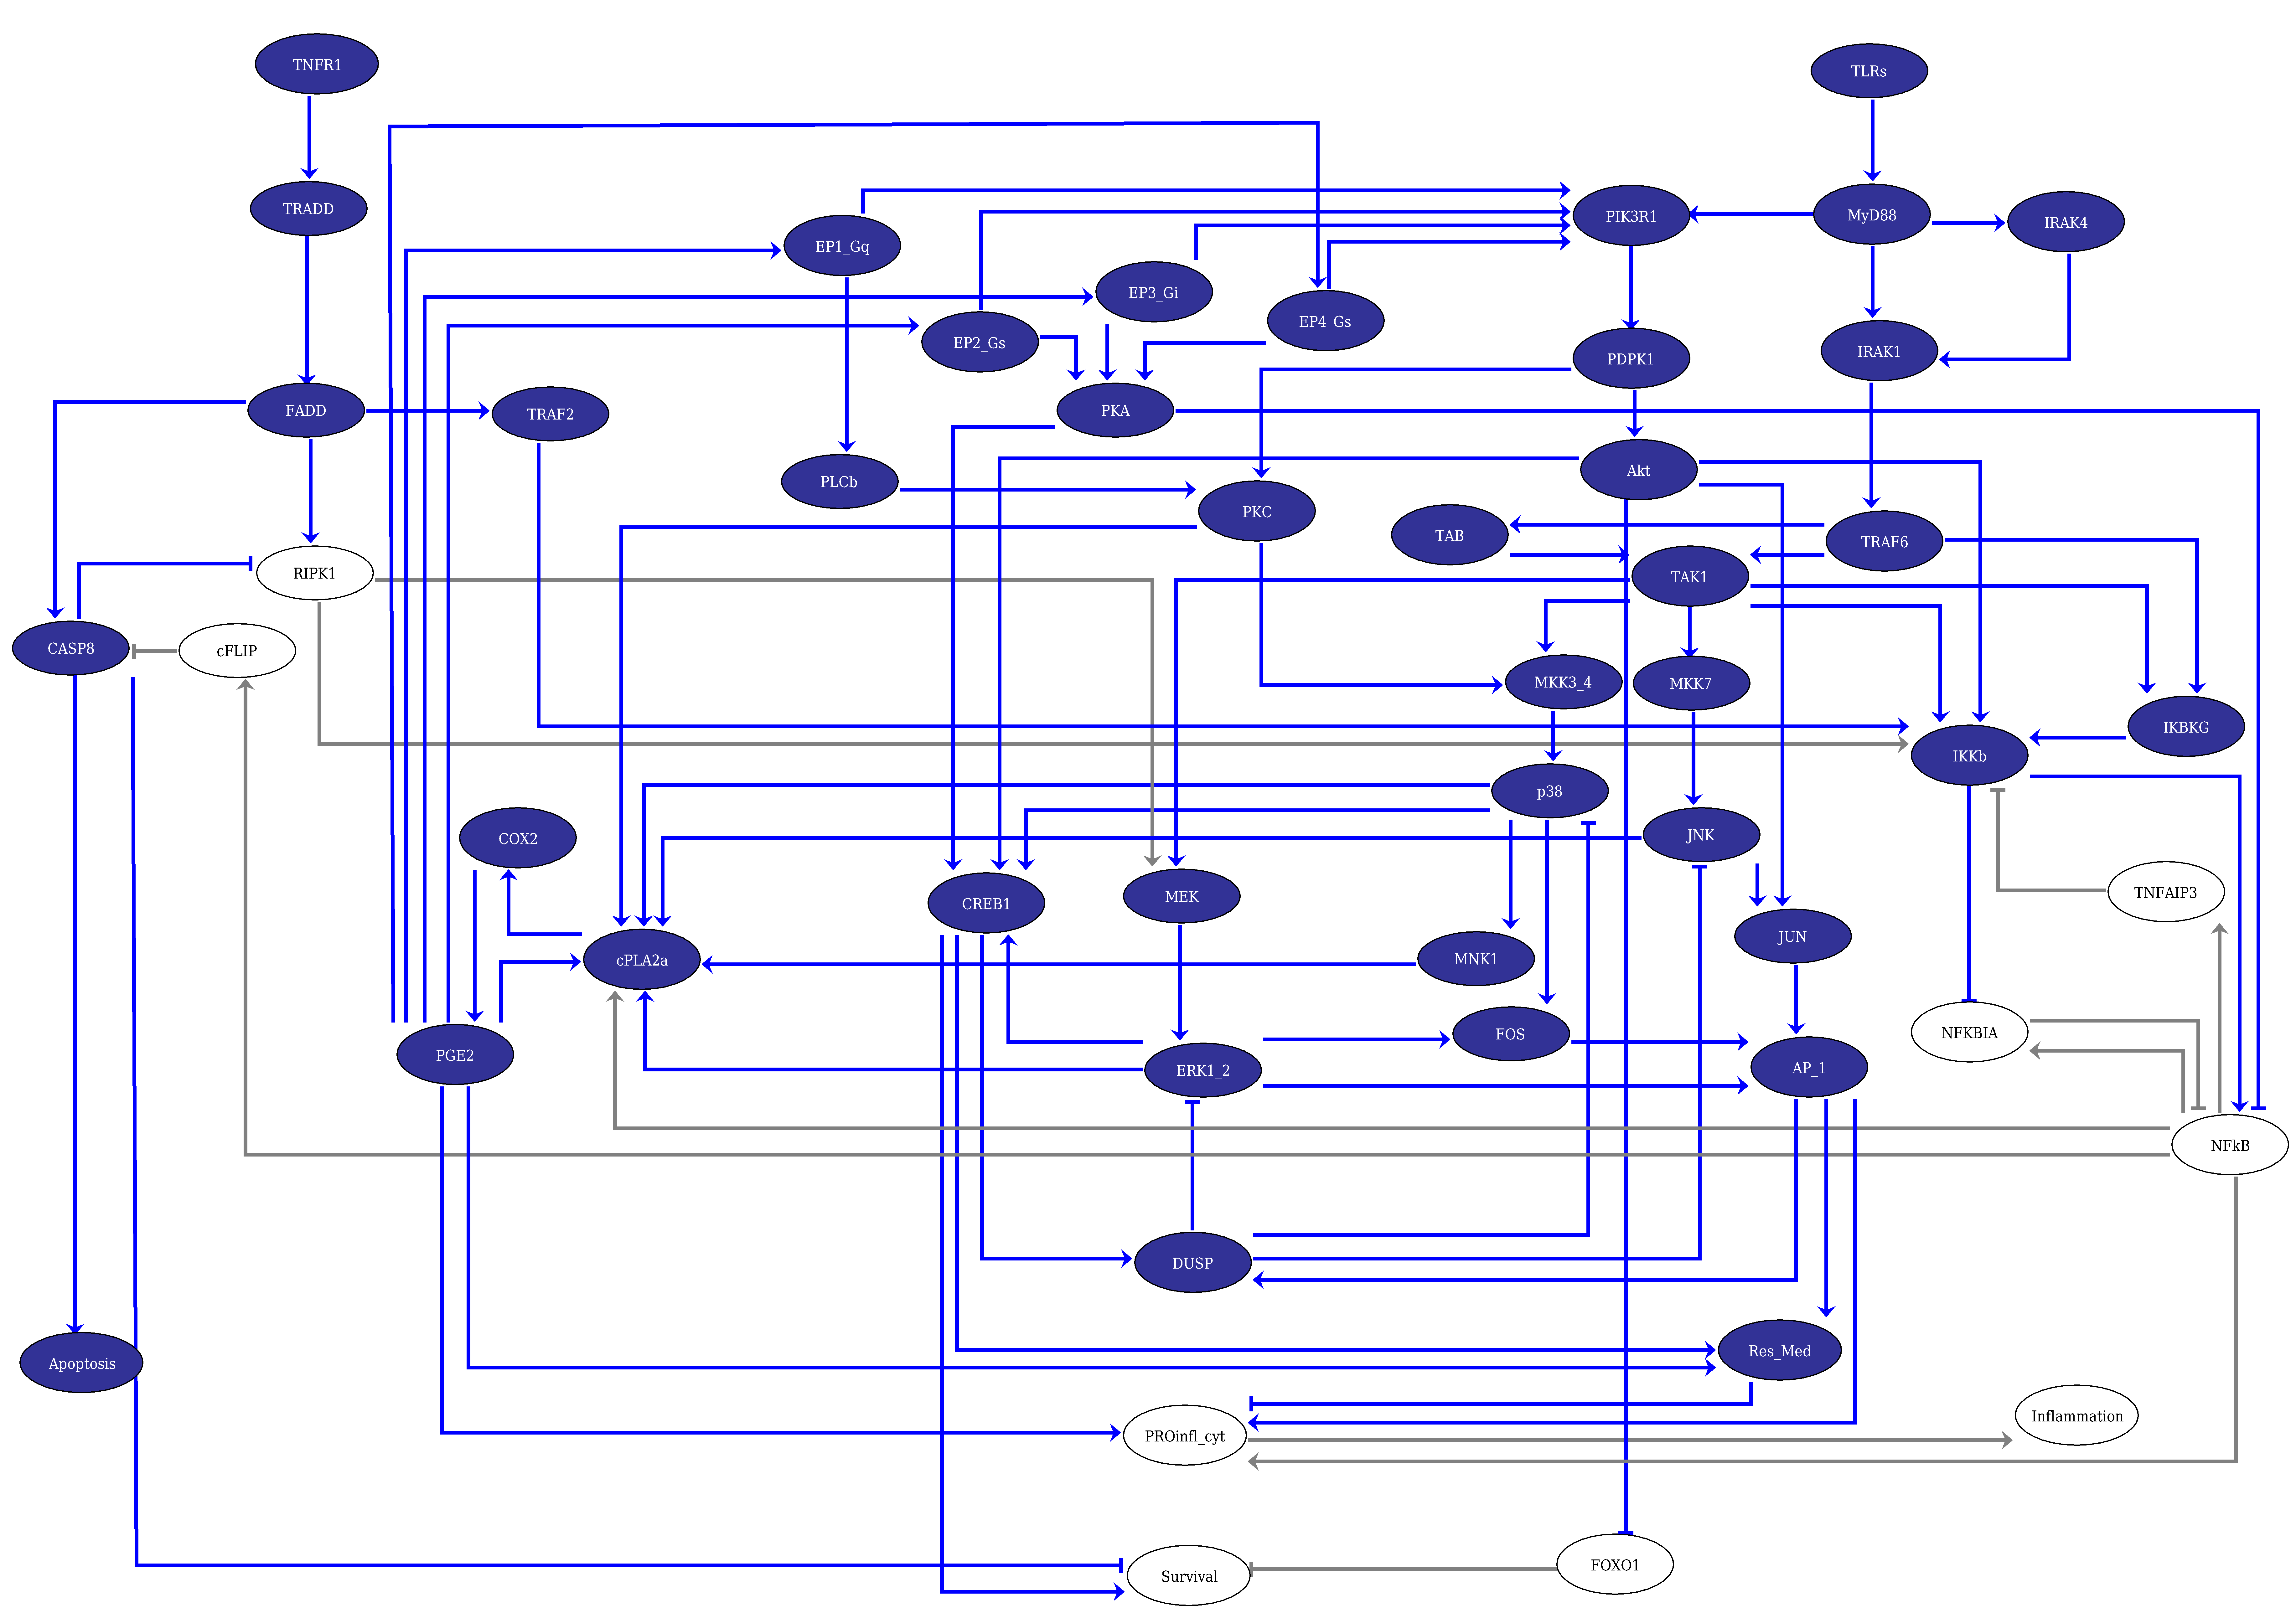

In [4]:
'''Compute stable states'''
fixpoints = biolqm.fixpoints(lqm)
tabulate(fixpoints)

#'''Visualisation'''
sys.displayhook((ginsim.show(lrg, fixpoints[0])))
sys.displayhook((ginsim.show(lrg, fixpoints[1])))
sys.displayhook((ginsim.show(lrg, fixpoints[2])))
sys.displayhook((ginsim.show(lrg, fixpoints[3])))

The model is able to reach two pre-defined states, representing two alternative cell fates; resolution of inflammation and apoptosis. 

As a next step the trap spaaces were calculated, in order to identify cyclic attractors from which the model cannot escape (*ref* [Zanudo 2013](https://arxiv.org/abs/1304.3467) and [Klarner 2014](https://link.springer.com/chapter/10.1007/978-3-319-11520-7_59)). At trap spaces, some of the model's components will have a fixed value while other will oscilate. As inflammation is a dynamic process and contains multiple feedback loops, we expect that state to represented as a trap space. 

In [5]:
'''Compute trap space analysis'''
traps = biolqm.trapspace(lqm)
tabulate(traps)
#df = pd.DataFrame(traps)
#df.to_csv('file_name.csv')


<table>
<thead>
<tr><th style="text-align: right;">  </th><th style="text-align: right;">  TNFR1</th><th style="text-align: right;">  TLRs</th><th style="text-align: right;">  MyD88</th><th style="text-align: right;">  IRAK1</th><th style="text-align: right;">  IRAK4</th><th style="text-align: right;">  TRAF6</th><th style="text-align: right;">  TAB</th><th style="text-align: right;">  TAK1</th><th style="text-align: right;">  IKKb</th><th style="text-align: right;">  NFKBIA</th><th style="text-align: right;">  IKBKG</th><th style="text-align: right;">  NFkB</th><th style="text-align: right;">  TNFAIP3</th><th style="text-align: right;">  MKK3_4</th><th style="text-align: right;">  MKK7</th><th style="text-align: right;">  MEK</th><th style="text-align: right;">  p38</th><th style="text-align: right;">  ERK1_2</th><th style="text-align: right;">  JNK</th><th style="text-align: right;">  DUSP</th><th style="text-align: right;">  MNK1</th><th style="text-align: right;">  PIK3R1</th><th style="text-align: right;">  PDPK1</th><th style="text-align: right;">  Akt</th><th style="text-align: right;">  PKC</th><th style="text-align: right;">  AP_1</th><th style="text-align: right;">  FOS</th><th style="text-align: right;">  JUN</th><th style="text-align: right;">  CREB1</th><th style="text-align: right;">  PLCb</th><th style="text-align: right;">  PKA</th><th style="text-align: right;">  cPLA2a</th><th style="text-align: right;">  COX2</th><th style="text-align: right;">  PGE2</th><th style="text-align: right;">  EP1_Gq</th><th style="text-align: right;">  EP2_Gs</th><th style="text-align: right;">  EP3_Gi</th><th style="text-align: right;">  EP4_Gs</th><th style="text-align: right;">  PROinfl_cyt</th><th style="text-align: right;">  Inflammation</th><th style="text-align: right;">  Res_Med</th><th style="text-align: right;">  RIPK1</th><th style="text-align: right;">  TRADD</th><th style="text-align: right;">  TRAF2</th><th style="text-align: right;">  FADD</th><th style="text-align: right;">  CASP8</th><th style="text-align: right;">  cFLIP</th><th style="text-align: right;">  Apoptosis</th><th style="text-align: right;">  Survival</th><th style="text-align: right;">  FOXO1</th></tr>
</thead>
<tbody>
<tr><td style="text-align: right;"> 0</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       0</td><td style="text-align: right;">      1</td><td style="text-align: right;">     0</td><td style="text-align: right;">        0</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">       1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">            0</td><td style="text-align: right;">             0</td><td style="text-align: right;">        1</td><td style="text-align: right;">      0</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      0</td><td style="text-align: right;">          1</td><td style="text-align: right;">         0</td><td style="text-align: right;">      0</td></tr>
<tr><td style="text-align: right;"> 1</td><td style="text-align: right;">      0</td><td style="text-align: right;">     1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       0</td><td style="text-align: right;">      1</td><td style="text-align: right;">     0</td><td style="text-align: right;">        0</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">       1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">            0</td><td style="text-align: right;">             0</td><td style="text-align: right;">        1</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">          0</td><td style="text-align: right;">         1</td><td style="text-align: right;">      0</td></tr>
<tr><td style="text-align: right;"> 2</td><td style="text-align: right;">      1</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">        0</td><td style="text-align: right;">       1</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">       0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">            0</td><td style="text-align: right;">             0</td><td style="text-align: right;">        1</td><td style="text-align: right;">      0</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">      1</td><td style="text-align: right;">      0</td><td style="text-align: right;">          1</td><td style="text-align: right;">         0</td><td style="text-align: right;">      0</td></tr>
<tr><td style="text-align: right;"> 3</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">        0</td><td style="text-align: right;">       1</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    1</td><td style="text-align: right;">       0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">      1</td><td style="text-align: right;">    1</td><td style="text-align: right;">    1</td><td style="text-align: right;">     0</td><td style="text-align: right;">    1</td><td style="text-align: right;">    0</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    1</td><td style="text-align: right;">       1</td><td style="text-align: right;">     1</td><td style="text-align: right;">     1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">       1</td><td style="text-align: right;">            0</td><td style="text-align: right;">             0</td><td style="text-align: right;">        1</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">          0</td><td style="text-align: right;">         1</td><td style="text-align: right;">      0</td></tr>
<tr><td style="text-align: right;"> 4</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">   254</td><td style="text-align: right;">     254</td><td style="text-align: right;">      0</td><td style="text-align: right;">   254</td><td style="text-align: right;">      254</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">       0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">            0</td><td style="text-align: right;">             0</td><td style="text-align: right;">        0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    254</td><td style="text-align: right;">          0</td><td style="text-align: right;">         0</td><td style="text-align: right;">      1</td></tr>
<tr><td style="text-align: right;"> 5</td><td style="text-align: right;">      1</td><td style="text-align: right;">     0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">   254</td><td style="text-align: right;">     254</td><td style="text-align: right;">      0</td><td style="text-align: right;">   254</td><td style="text-align: right;">      254</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">  254</td><td style="text-align: right;">    0</td><td style="text-align: right;">     254</td><td style="text-align: right;">    0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">      0</td><td style="text-align: right;">    0</td><td style="text-align: right;">    0</td><td style="text-align: right;">   254</td><td style="text-align: right;">  254</td><td style="text-align: right;">    0</td><td style="text-align: right;">      0</td><td style="text-align: right;">     0</td><td style="text-align: right;">    0</td><td style="text-align: right;">       0</td><td style="text-align: right;">     0</td><td style="text-align: right;">     0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">       0</td><td style="text-align: right;">          254</td><td style="text-align: right;">           254</td><td style="text-align: right;">      254</td><td style="text-align: right;">    254</td><td style="text-align: right;">      1</td><td style="text-align: right;">      1</td><td style="text-align: right;">     1</td><td style="text-align: right;">    254</td><td style="text-align: right;">    254</td><td style="text-align: right;">        254</td><td style="text-align: right;">         0</td><td style="text-align: right;">      1</td></tr>
</tbody>
</table>

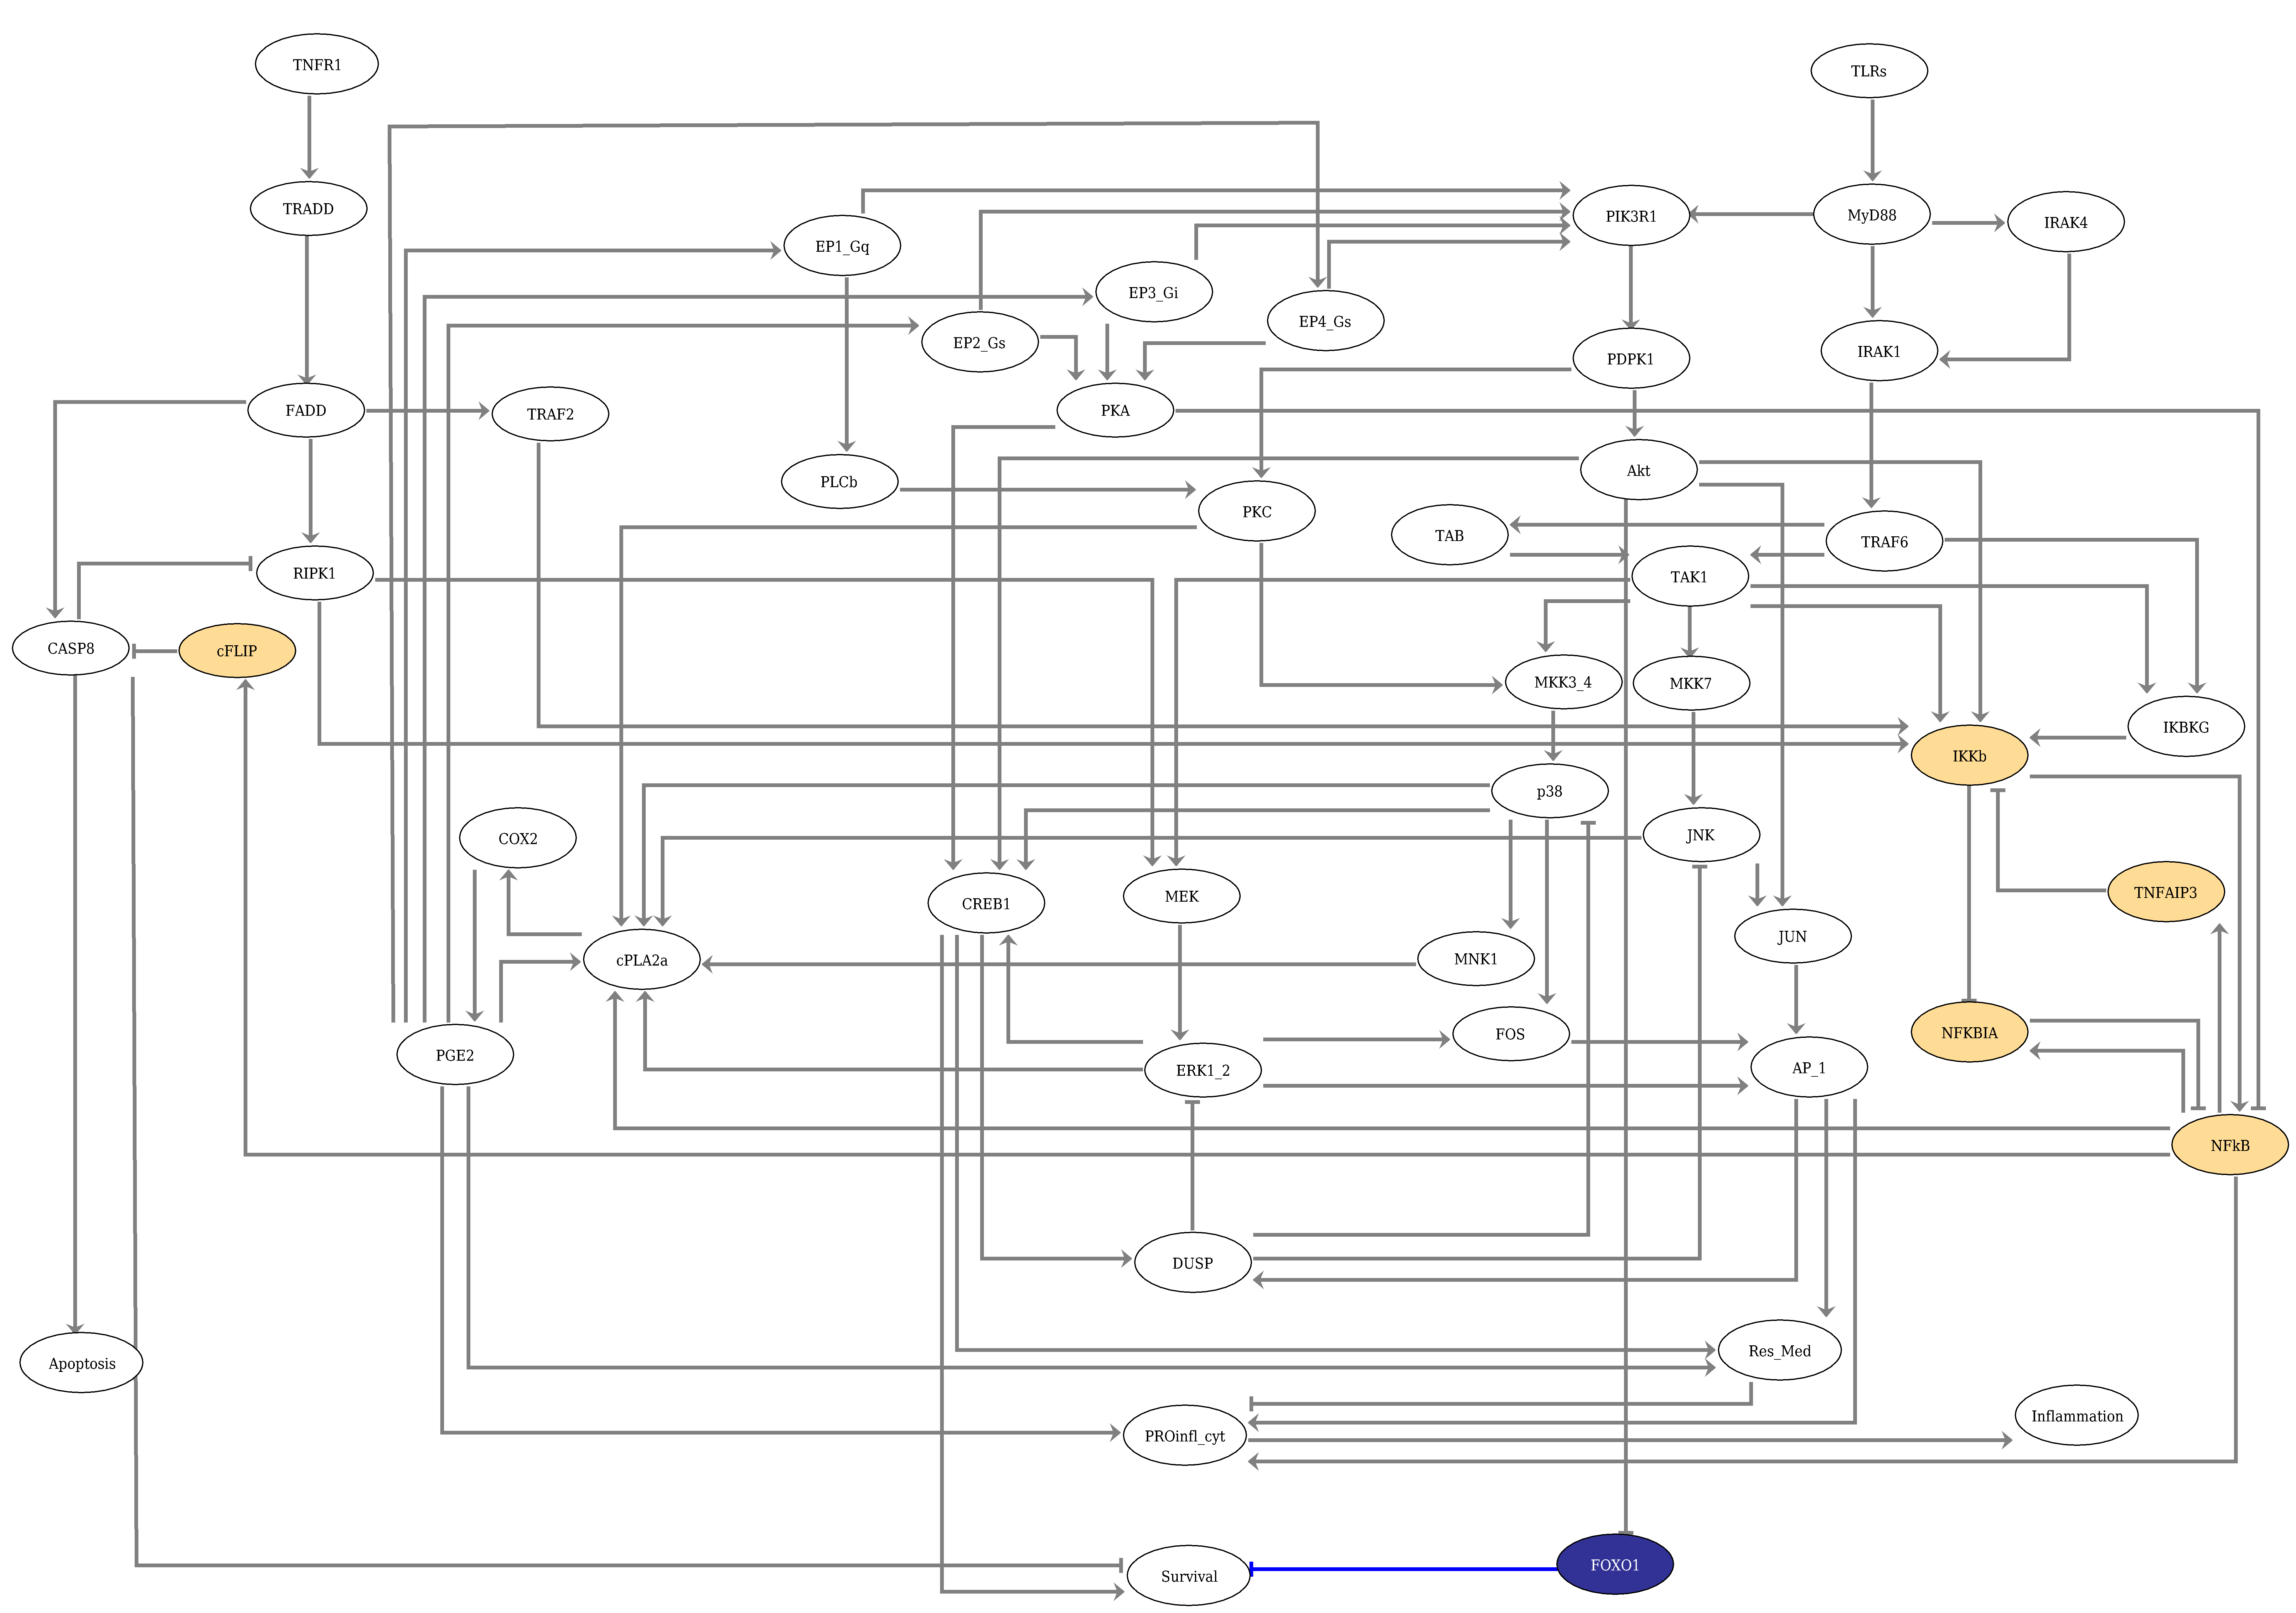

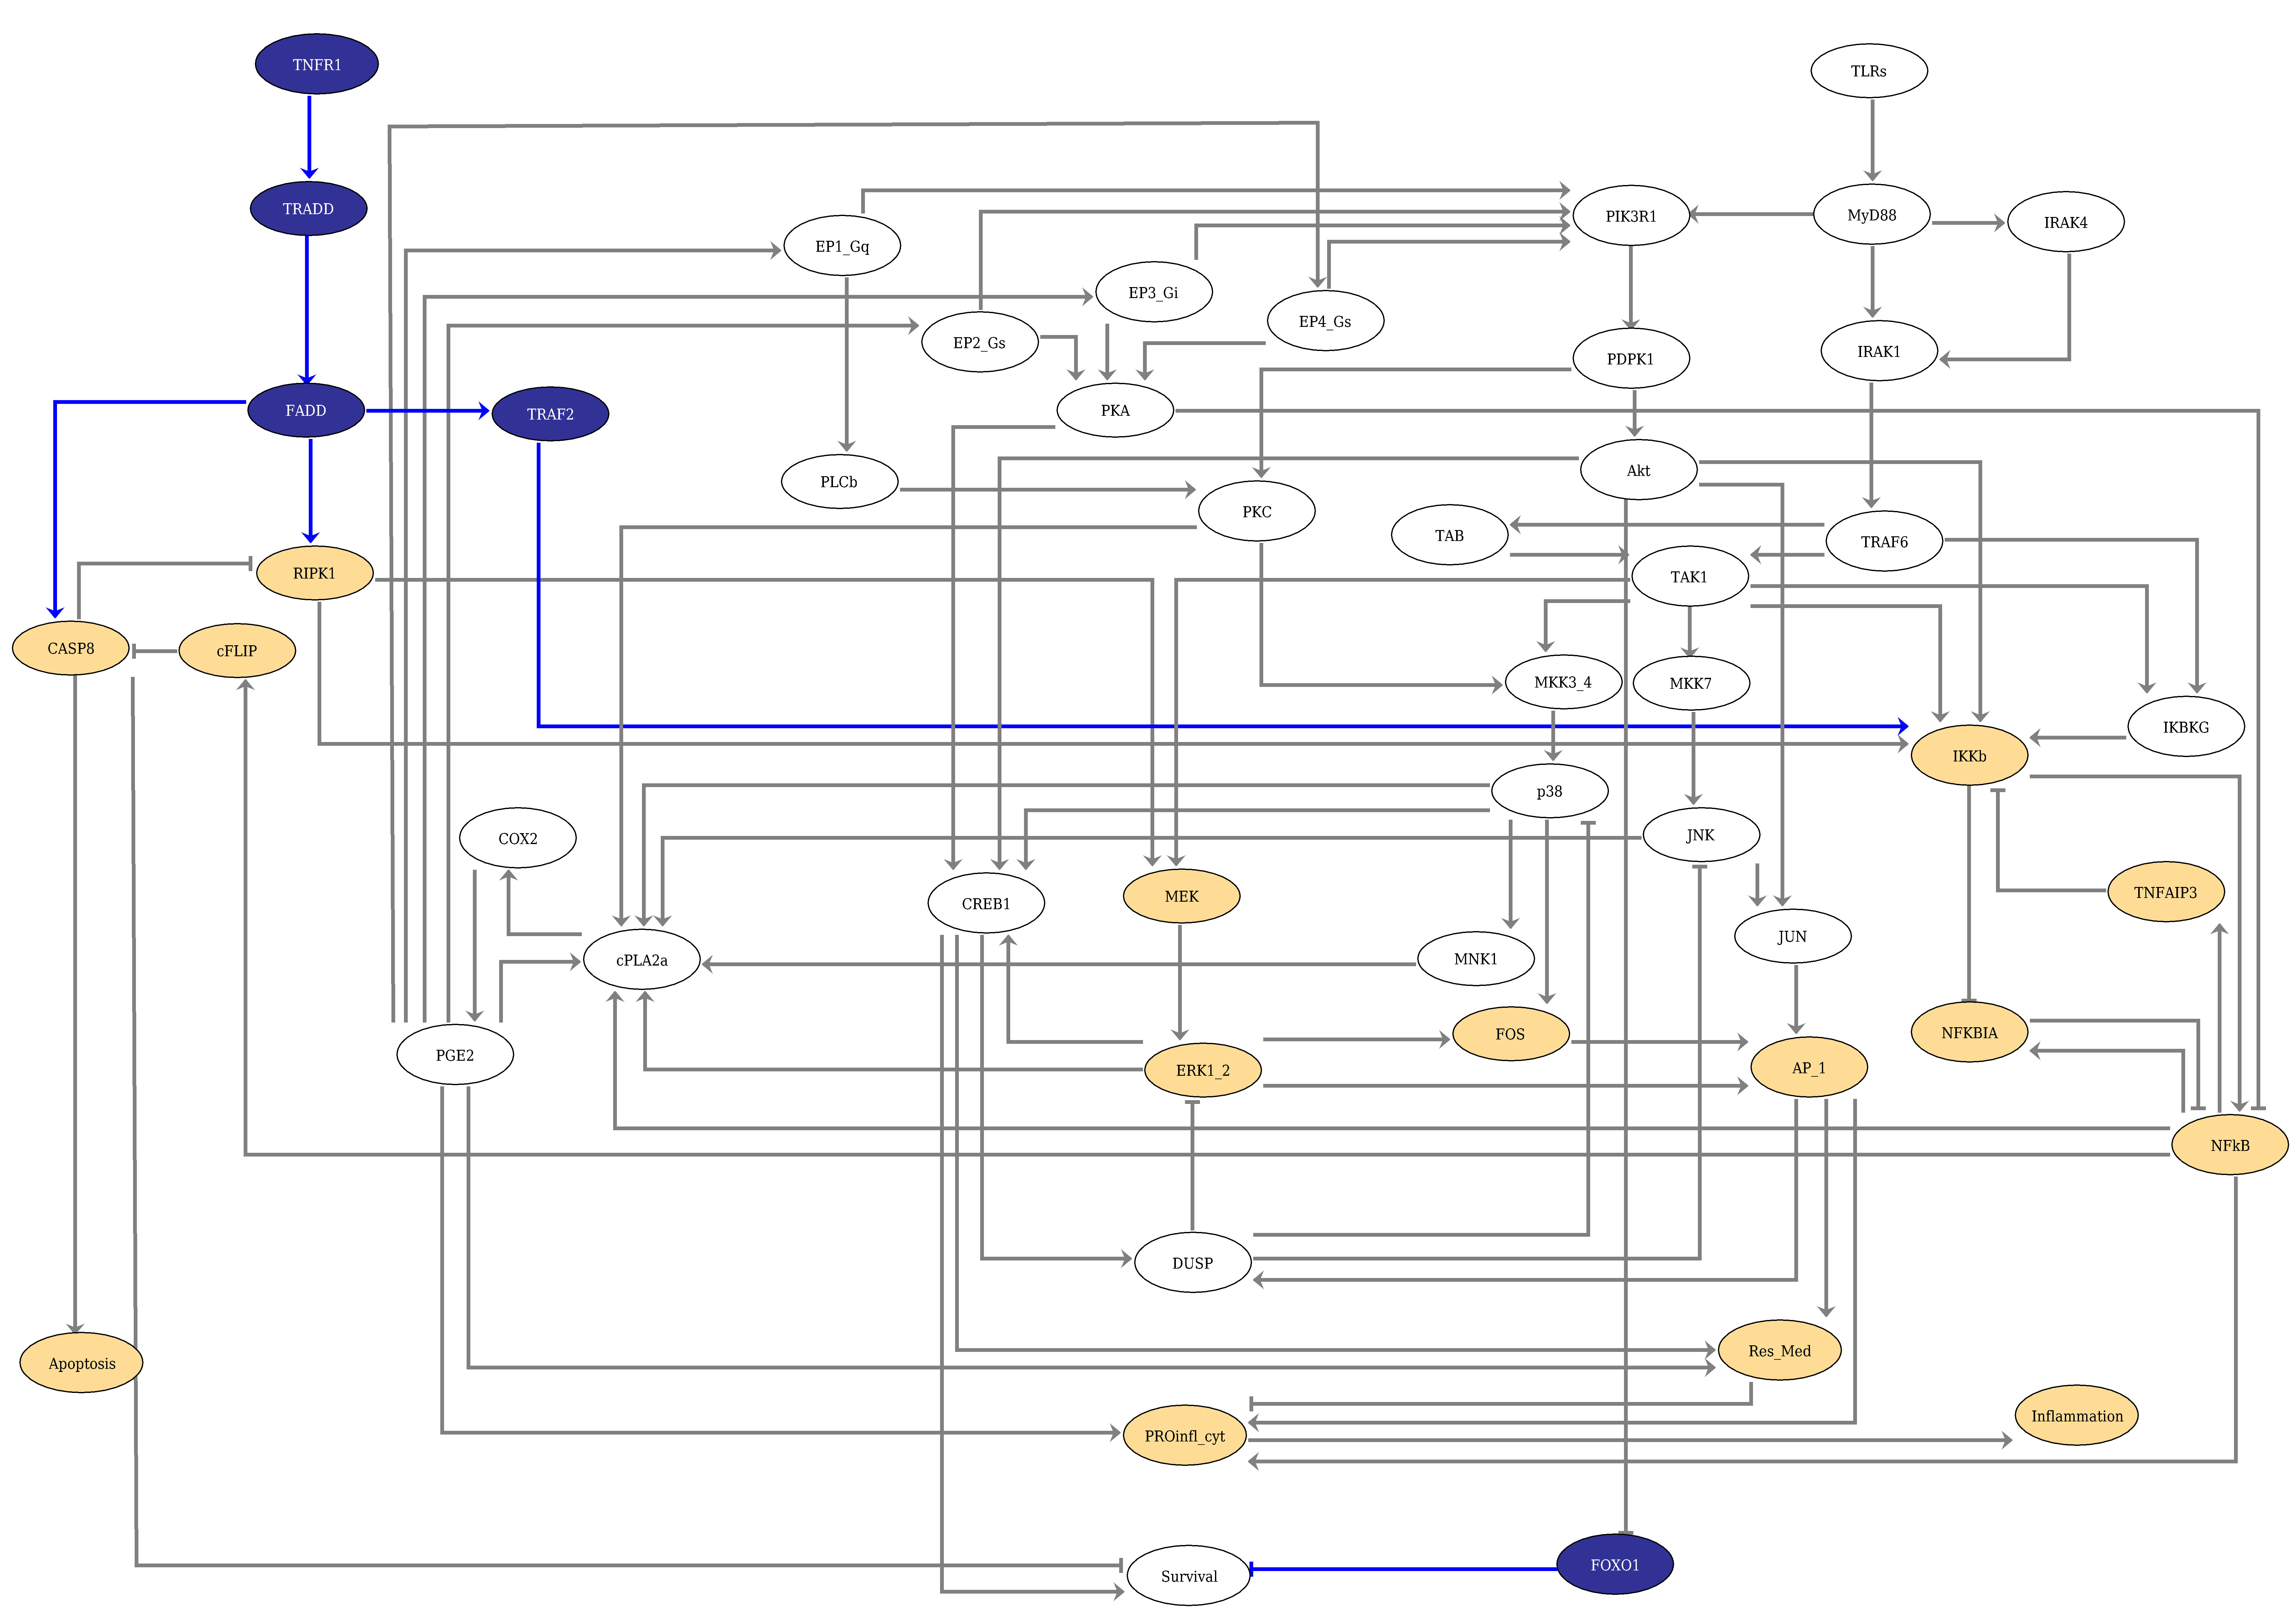

In [6]:
sys.displayhook((ginsim.show(lrg, traps[4])))
sys.displayhook((ginsim.show(lrg, traps[5])))

NB! Nodes with a value of 254 (orange colored nodes) can be either 1 or 0.

### Perturbation analysis

In the following section of the analysis, a series of perturbations collected by the literature were simulated in order to evaluate the ability to perform in accordance with biological reality.

In [18]:
'''Define the list of perturbations to be tested'''

node_list = []

perturbations = ["AP_1%0", "Akt%0", "CASP8%0", "COX2%0", "CREB1%0", "DUSP%0", "EP1_Gq%0", "EP2_Gs%0", "EP3_Gi%0", "EP4_Gs%0", "ERK1_2%0", "FADD%0", "FOS%0", "IKBKG%0", "IKKb%0", "IRAK1%0", "IRAK4%0", "JNK%0", "JUN%0", "MEK%0", "MKK3_4%0", "MKK7%0", "MNK1%0", "MyD88%0", "NFKBIA%0", "NFkB%0", "PDPK1%0", "PGE2%0", "PIK3R1%0", "PKA%0", "PKC%0", "PLCb%0", "PROinfl_cyt%0", "RIPK1%0", "Res_Med%0", "TAB%0", "TAK1%0", "TLRs%0", "TNFAIP3%0", "TNFR1%0", "TRADD%0", "TRAF2%0", "TRAF6%0", "cFLIP%0", "cPLA2a%0", "p38%0"]

In [19]:
'''Define dictionaries to store attractors for each perturbation'''
fixpointlist = {}

'''trapspacelist is used for perturbations where no stable state is found
    to find eventual cyclic attractors.'''
trapspacelist = {}

for p in perturbations:
    fixpoints = biolqm.fixpoints(biolqm.perturbation(lqm, p))
    if(fixpoints):
        fixpointlist[p] = fixpoints
    else:
        '''No stable state found, so we look for cycles'''
        trapspace = biolqm.trapspace(biolqm.perturbation(lqm, p))
        trapspacelist[p] = trapspace

'''uncomment to see attractors in tabulated tables for each perturbation
for k, v in fixpointlist.items():
    print(k)
    sys.displayhook(tabulate(v))
    print()
    
for k, v in trapspacelist.items():
    print(k)
    sys.displayhook(tabulate(v))
    print()'''

'uncomment to see attractors in tabulated tables for each perturbation\nfor k, v in fixpointlist.items():\n    print(k)\n    sys.displayhook(tabulate(v))\n    print()\n    \nfor k, v in trapspacelist.items():\n    print(k)\n    sys.displayhook(tabulate(v))\n    print()'

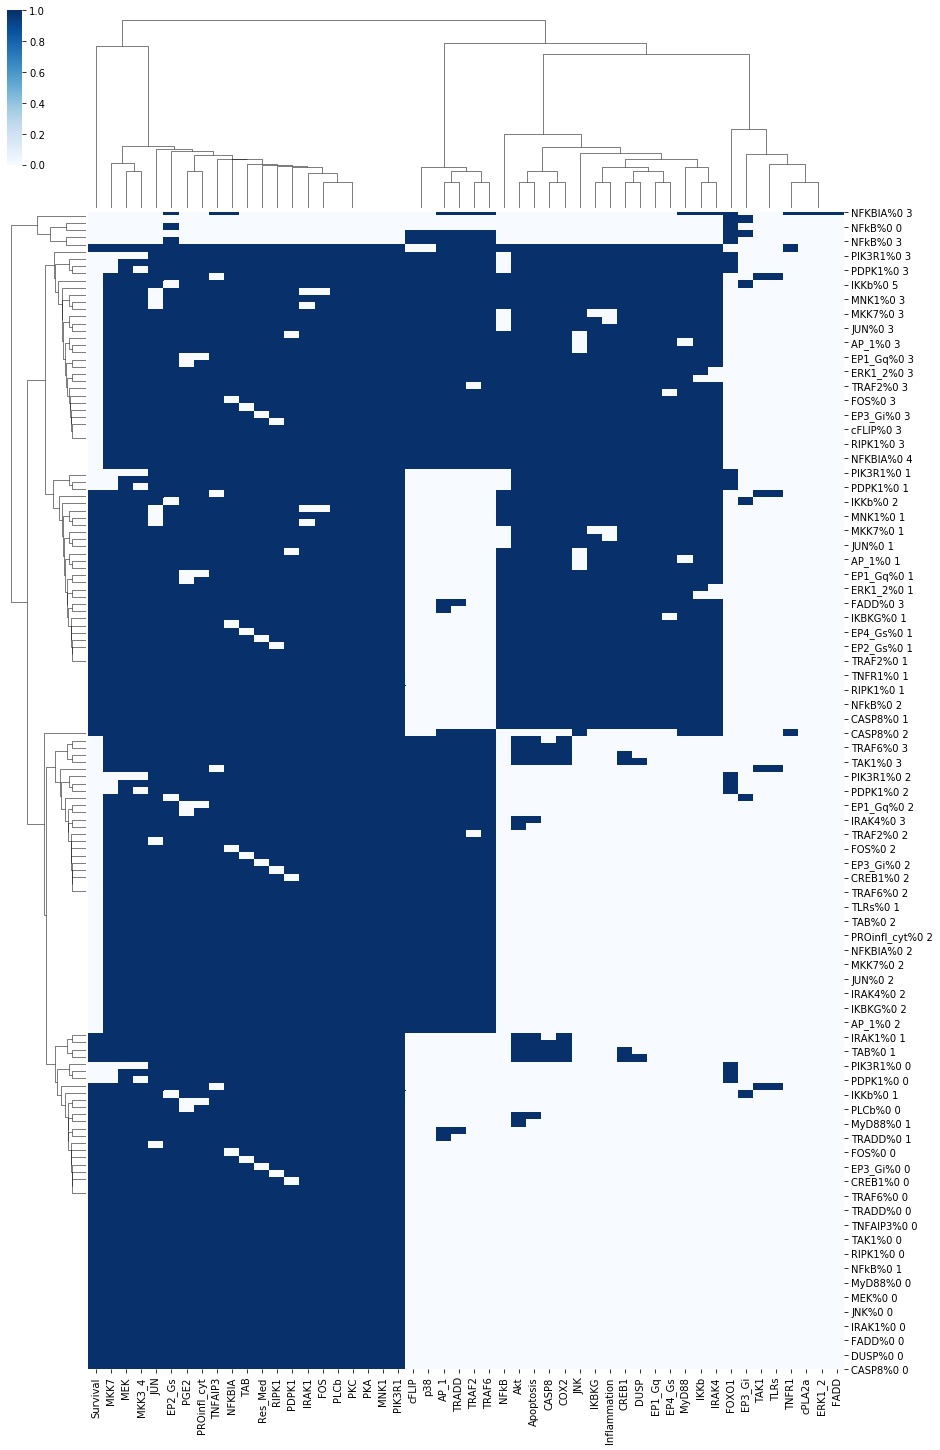

In [20]:
import seaborn as sns

'''List of perturbations with the nb of stable states '''
perturbstates=[]
trappedstates=[]

'''List of table state values same order as perturbStates'''
stablestates = [] 
tstates = [] 

'''List of nodes'''
nodelist = ["AP_1", "Akt", "Apoptosis", "CASP8", "COX2", "CREB1", "DUSP", "EP1_Gq", "EP2_Gs", "EP3_Gi", "EP4_Gs", "ERK1_2", "FADD", "FOS", "IKBKG", "IKKb", "IRAK1", "IRAK4", "Inflammation", "JNK", "JUN", "MEK", "MKK3_4", "MKK7", "MNK1", "MyD88", "NFKBIA", "NFkB", "PDPK1", "PGE2", "PIK3R1", "PKA", "PKC", "PLCb", "PROinfl_cyt", "RIPK1", "Res_Med", "TAB", "TAK1", "TLRs", "TNFAIP3", "TNFR1", "TRADD", "TRAF2", "TRAF6", "cFLIP", "cPLA2a", "p38", "Survival", "FOXO1"]

for k,v in fixpointlist.items():   
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            listSS.append(val)
        stablestates.append(listSS)
        perturbstates.append(str(k)+' '+str(i))

'''Create dataframe: columns = nodes, rows = perturbations'''
df = DataFrame(data=stablestates)
df.columns = nodelist
df.index = perturbstates

'''Generate clustered heatmap'''
cm = sns.clustermap(df, metric='euclidean', cmap = 'Blues',  figsize=(15, 25))
cm.savefig("SSclusters.png")


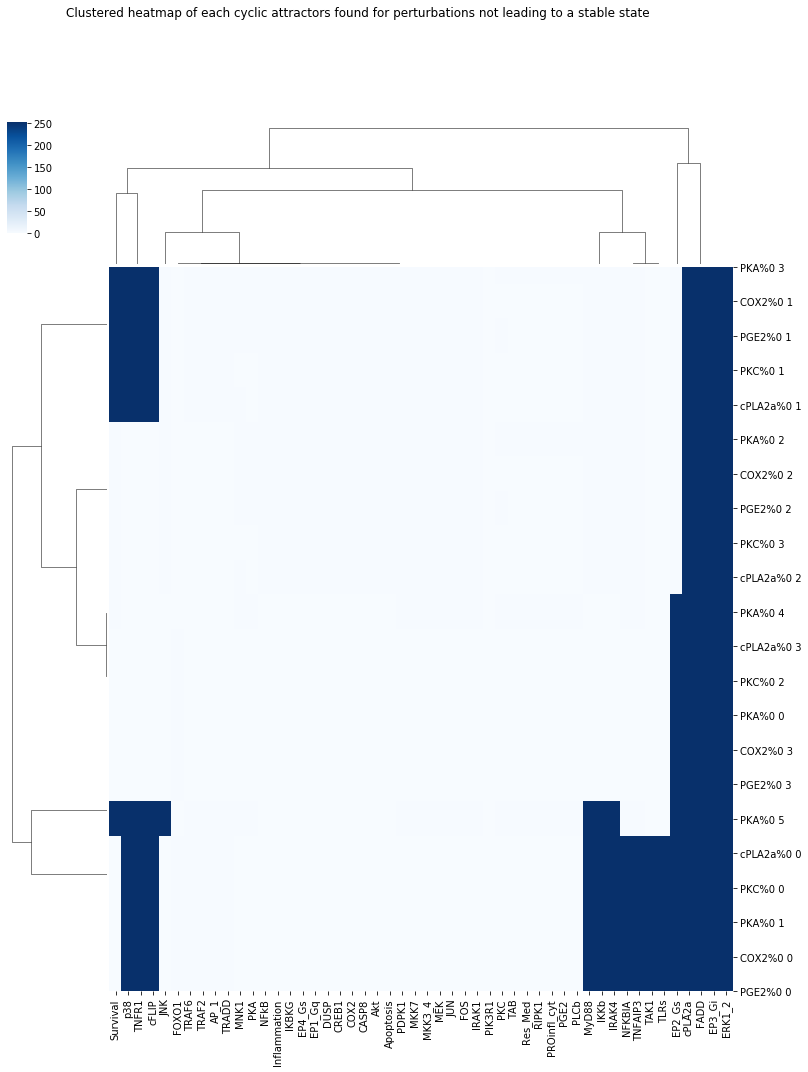

In [21]:
from matplotlib.colors import ListedColormap

'''Repeat previous analysis for the trap space data'''
for k,v in trapspacelist.items():   
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            if val == 255:
                val = 5
            listSS.append(val)
        tstates.append(listSS)
        trappedstates.append(str(k)+' '+str(i))

'''List of nodes in the trap space: multi valued components are expanded into several nodes'''        
nodelistT = ["AP_1", "Akt", "Apoptosis", "CASP8", "COX2", "CREB1", "DUSP", "EP1_Gq", "EP2_Gs", "EP3_Gi", "EP4_Gs", "ERK1_2", "FADD", "FOS", "IKBKG", "IKKb", "IRAK1", "IRAK4", "Inflammation", "JNK", "JUN", "MEK", "MKK3_4", "MKK7", "MNK1", "MyD88", "NFKBIA", "NFkB", "PDPK1", "PGE2", "PIK3R1", "PKA", "PKC", "PLCb", "PROinfl_cyt", "RIPK1", "Res_Med", "TAB", "TAK1", "TLRs", "TNFAIP3", "TNFR1", "TRADD", "TRAF2", "TRAF6", "cFLIP", "cPLA2a", "p38", "Survival", "FOXO1"]

df2 = DataFrame(data=tstates)
df2.columns = nodelistT
df2.index = trappedstates
cm2 = sns.clustermap(df2, metric='euclidean', cmap="Blues", yticklabels=True,  figsize=(13, 16))
cm2.fig.suptitle('Clustered heatmap of each cyclic attractors found for perturbations not leading to a stable state')
cm2.savefig("TSclusters.png")


## Model validation through perturbations

**Paper**: [Toll-like receptor 4 signaling regulates cytosolic phospholipase A2 activation and lipid generation in lipopolysaccharide-stimulated macrophages.](https://www.ncbi.nlm.nih.gov/pubmed/16176925) 

**Perturbations:** 
- TLR4 inhibition results in inhibition of NFkB inhibition of cPLA2-mediated AA release
- TLR4 and MyD88 siRNAs decrease the phosphorylation of cPLA2, p38, and ERK
- ERK and p38 inhibition inhibits cPLA2-mediated AA release
- Inhibition of AKT does not inhibit phosphorylation of cPLA2 and arachidonic acid release

In [ ]:
'''List of perturbations'''
p_TLR_0 = biolqm.perturbation(lqm, "TLRs%0")
p_TLR_MyD88_0 = biolqm.perturbation(lqm, "TLRs%0,MyD88%0")
p_ERK_p38_0 = biolqm.perturbation(lqm, "ERK1_2%0,p38%0")
p_AKT_0 = biolqm.perturbation(lqm, "Akt%0")

In [ ]:
fps = biolqm.fixpoints(p_AKT_0)
tabulate(fps)

In [ ]:
traps = biolqm.trapspace(p_AKT_0, "terminal")
tabulate(traps)

**Paper:** [TNF-α-Induced Apoptosis of Macrophages Following Inhibition of NF-κB: A Central Role for Disruption of Mitochondria](https://www.jimmunol.org/content/172/3/1907)

**Perturbations:**
- NfkB inhibition promotes TNF-a induced apoptosis

In [ ]:
'''List of perturbations'''
p_NFKb_0 = biolqm.perturbation(lqm, "NFkB%0")

In [ ]:
fps = biolqm.fixpoints(p_NFKb_0)
tabulate(fps)

In [ ]:
traps = biolqm.trapspace(p_NFKb_0, "terminal")
tabulate(traps)

**Paper:** [Cytosolic Phospholipase A2 Regulates TNF-Induced Production of Joint Destructive Effectors in Synoviocytes](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0083555)

**Perturbations:**
- cPLA2 inhibition reduces levels of PGE2

In [ ]:
'''List of perturbations'''
p_cPLA2_0 = biolqm.perturbation(lqm, "cPLA2a%0")

In [ ]:
fps = biolqm.fixpoints(p_cPLA2_0)
tabulate(fps)

In [ ]:
traps = biolqm.trapspace(p_cPLA2_0, "terminal")
tabulate(traps)

**Paper:** [Signaling to NF-kB by Toll-like
receptors](https://www.cell.com/trends/molecular-medicine/pdf/S1471-4914(07)00184-0.pdf)

**Perturbations:**

**Paper:** [Unravelling the complexities of the NF-jB signalling pathway using mouse
knockout andtransgenic models](https://www.nature.com/articles/1209944.pdf?origin=ppub)

**Perturbations:**
- IKKb inhibition increases TNFa-induced apoptosis
- IKBKG inhibition enchances apoptosis

In [ ]:
'''List of perturbations'''
p_IKKb_0 = biolqm.perturbation(lqm, "IKKb%0")
p_IKBKG_0 = biolqm.perturbation(lqm, "IKBKG%0")

In [ ]:
fps = biolqm.fixpoints(p_IKBKG_0)
tabulate(fps)

In [ ]:
traps = biolqm.trapspace(p_IKBKG_0, "terminal")
tabulate(traps)

**Paper:** [Targeting cytosolic phospholipase A2 α in colorectal cancer cells inhibits constitutively activated protein kinase B (AKT) and cell proliferation](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4322978/)

**Perturbations:**
- Over-expression of cPLA2α AKT phosphorylation and proliferation

In [ ]:
'''List of perturbations'''
p_cPLA2a_1 = biolqm.perturbation(lqm, "cPLA2a%1")

In [ ]:
fps = biolqm.fixpoints(p_cPLA2a_1)
tabulate(fps)

In [ ]:
traps = biolqm.trapspace(p_cPLA2a_1, "terminal")

## MaBoSS

In [5]:
masim = ginsim.to_maboss(lrg)

In [6]:
masim.network.set_output(('Survival', 'Res_Med', 'Inflammation', 'Apoptosis'))

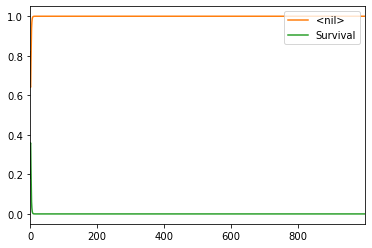

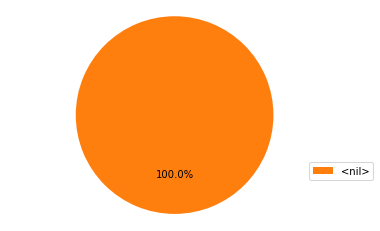

In [7]:
masim.network.set_istate("IKBKG", [1, 0])
res = masim.run()
res.plot_trajectory()
res.plot_piechart(autopct=True)

In [ ]:
mutsim = masim.copy()
mutsim.mutate("Mdm2nuc", "ON")
mutres = mutsim.run()
mutres.plot_piechart()

## Mutation prediction with PINT

In [7]:
m = biolqm.to_pint(lqm)

In [17]:
goal = Goal("Inflammation=1")
m.initial_state["cPLA2a"] = 1
m.initial_state["NFkB"] = 1
mutations = m.oneshot_mutations_for_cut(goal, maxsize=3, exclude={"Apoptosis","Survival"})
mutations

This computation is an *under-approximation*: returned mutations are all valid, but they may be non-minimal, and some solutions may be missed.

Limiting solutions to mutations of at most 3 automata. Use `maxsize` argument to change.

[{'PROinfl_cyt': 0},
 {'Res_Med': 1},
 {'NFkB': 0, 'cPLA2a': 0},
 {'NFkB': 0, 'COX2': 0},
 {'NFkB': 0, 'PGE2': 0},
 {'AP_1': 0, 'cPLA2a': 0},
 {'AP_1': 0, 'COX2': 0},
 {'AP_1': 0, 'PGE2': 0},
 {'TNFR1': 0, 'TLRs': 0, 'cPLA2a': 0},
 {'TNFR1': 0, 'TLRs': 0, 'COX2': 0},
 {'TNFR1': 0, 'TLRs': 0, 'PGE2': 0},
 {'TNFR1': 0, 'MyD88': 0, 'cPLA2a': 0},
 {'TNFR1': 0, 'MyD88': 0, 'COX2': 0},
 {'TNFR1': 0, 'MyD88': 0, 'PGE2': 0},
 {'TNFR1': 0, 'IRAK1': 0, 'cPLA2a': 0},
 {'TNFR1': 0, 'IRAK1': 0, 'COX2': 0},
 {'TNFR1': 0, 'IRAK1': 0, 'PGE2': 0},
 {'TNFR1': 0, 'IRAK4': 0, 'cPLA2a': 0},
 {'TNFR1': 0, 'IRAK4': 0, 'COX2': 0},
 {'TNFR1': 0, 'IRAK4': 0, 'PGE2': 0},
 {'TNFR1': 0, 'TRAF6': 0, 'cPLA2a': 0},
 {'TNFR1': 0, 'TRAF6': 0, 'COX2': 0},
 {'TNFR1': 0, 'TRAF6': 0, 'PGE2': 0},
 {'TNFR1': 0, 'TAB': 0, 'cPLA2a': 0},
 {'TNFR1': 0, 'TAB': 0, 'COX2': 0},
 {'TNFR1': 0, 'TAB': 0, 'PGE2': 0},
 {'TNFR1': 0, 'TAK1': 0, 'cPLA2a': 0},
 {'TNFR1': 0, 'TAK1': 0, 'COX2': 0},
 {'TNFR1': 0, 'TAK1': 0, 'PGE2': 0},
 {'TLRs'

Test whether a certain mutations change the reachability of a phenotype

In [27]:
m.disable(CASP8=0).reachability("Apoptosis=1")

False

## Bifurcation analysis

_Given an initial state and a goal, a bifurcation transitions is a transition after which the goal is no longer reachable._


In [29]:
m.bifurcations("Inflammation=1")

This computation is an *under-approximation*: returned transitions are all bifurcation transitions, but some may have been missed. Use `method="exact"` for complete identification.

["PROinfl_cyt" 1 -> 0" when "NFkB"=1 and "AP_1"=1 and "Res_Med"=1",
 "Res_Med" 0 -> 1" when "AP_1"=1",
 "Res_Med" 0 -> 1" when "AP_1"=0 and "CREB1"=1",
 "Res_Med" 0 -> 1" when "AP_1"=0 and "CREB1"=0 and "PGE2"=1",
 "PROinfl_cyt" 1 -> 0" when "NFkB"=0 and "PGE2"=1 and "Res_Med"=1",
 "PROinfl_cyt" 1 -> 0" when "NFkB"=1 and "AP_1"=0 and "PGE2"=1 and "Res_Med"=1"]

### Perform simulation with mutations identified by PINT

In [ ]:
mutant_combinations = [combinations(m.items(), 2) for m in mutants if len(m) >= 2]
candidates = reduce(set.union, mutant_combinations, set())
candidates

### Run MaBoSS for the same mutations

In [ ]:
for mutant in sorted(candidates):
    mut_sim = wt_sim.copy()
    for (node, value) in mutant:
        mut_sim.mutate(node, "ON" if value else "OFF")
    mut_res = mut_sim.run()
    mut_res.plot_piechart(embed_labels=False, autopct=4)
    mutant_name = "/".join(["%s:%s"%m for m in mutant])
    plt.title("%s mutant" % mutant_name)